In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import keras
from keras import utils

Using TensorFlow backend.


In [4]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB 
from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.multiclass import OneVsRestClassifier

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import plot_roc_curve

from sklearn.preprocessing import label_binarize

## Data

In [5]:
path = "/Users/jiangruiyin/Desktop/657/data_cleaned(1).csv"

In [6]:
data = pd.read_csv(path, header=None, names=['lyrics', 'label'])

In [7]:
data

,lyrics,label
0,touch me turn me on and burn me down your li...,0
1,well i dont give a damn that your cars on fire...,0
2,i saw you starin at each other i saw your eyes...,0
3,your cruel device your blood like ice one look...,0
4,stretch the bones over my skin stretch the ski...,0
...,...,...
2459,haces muy mal en elevar mi tensión en aplastar...,3
2460,cierro los ojos sin mirar atrás las cosas buen...,3
2461,una palomita blanca de piquito colorado ayer y...,3
2462,sólo una palabra se hubiera llevado el dolor c...,3


In [8]:
labels = data.iloc[:,1]
lyrics = data.iloc[:,0]

In [9]:
labels[2462]

3

In [10]:
lyrics[2462]

'sólo una palabra se hubiera llevado el dolor con el beso amargo de aquel licor hubiera bastado mi amor sólo una mentira se viene conmigo a pasear sentirme querida en aquel abrazo en el mar  con el vestido azul que un día conociste me marcho sin saber si me besaste antes de irte te di mi corazón y tú lo regalaste te di todo el amor que pude darte y me robaste he rasgado mi vestido con una copa de vino hoy tu amor corta como el cristal  en el cielo hay playas donde ves la vida pasar donde los recuerdos no hacen llorar vienen muy despacio y se van sólo una caricia me hubiera ayudado a olvidar que no eran mis labios los que ahora te hacen soñar  con el vestido azul que un día conociste me marcho sin saber si me besaste antes de irte te di mi corazón y tú lo regalaste te di todo el amor que pude darte y me robaste he rasgado mi vestido con una copa de vino hoy tu amor corta como el cristal buena suerte en tu camino yo ya tengo mi destino con mi sangre escribo este final'

In [11]:
lyrics

0       touch me turn me on and burn me down   your li...
1       well i dont give a damn that your cars on fire...
2       i saw you starin at each other i saw your eyes...
3       your cruel device your blood like ice one look...
4       stretch the bones over my skin stretch the ski...
                              ...                        
2459    haces muy mal en elevar mi tensión en aplastar...
2460    cierro los ojos sin mirar atrás las cosas buen...
2461    una palomita blanca de piquito colorado ayer y...
2462    sólo una palabra se hubiera llevado el dolor c...
2463    lover please please come back dont take a trai...
Name: lyrics, Length: 2464, dtype: object

In [12]:
X_train, X_val, y_train, y_val = train_test_split(lyrics, labels, test_size=0.2, random_state=42)

In [13]:
X_train

1375    listen to the girl as she takes on half the wo...
903     have yourself a merry little christmas let you...
1939    the show is over partys just begun im high ton...
1325    one day well walk in the sun  my name is verno...
1995    mercy dont think shes pretty no more starin at...
                              ...                        
1638    ive seen god in the sun ive seen god in the st...
1095    i dont want another heartbreak i dont need ano...
1130    id gladly walk across the desert with no shoes...
1294    our god is an awesome god he reigns from heave...
860     i dont want you anymore cause you took my joy ...
Name: lyrics, Length: 1971, dtype: object

## TfidfVectorizer

In [14]:
from nltk.corpus import stopwords
# stopwords
stop_words_EN = stopwords.words('english')
stop_words_SP = stopwords.words('spanish')
stop_words = stop_words_EN + stop_words_SP
# TF-IDF
tf_transfomer = TfidfVectorizer(stop_words=stop_words, decode_error='ignore')
tf_transfomer.fit(lyrics)

TfidfVectorizer(analyzer='word', binary=False, decode_error='ignore',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True,
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                strip_accents=None, sublinear_tf=False,
                token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
                vocabulary=None)

In [15]:
X_train_counts_tf = tf_transfomer.transform(X_train)
X_val_counts_tf = tf_transfomer.transform(X_val)

In [16]:
X_train_counts_tf

<1971x14817 sparse matrix of type '<class 'numpy.float64'>'
	with 90867 stored elements in Compressed Sparse Row format>

In [17]:
X_val_counts_tf

<493x14817 sparse matrix of type '<class 'numpy.float64'>'
	with 22506 stored elements in Compressed Sparse Row format>

## Paras Tuning of base models

In [21]:
num_folds = 10
seed = 42
scoring = 'accuracy'

In [22]:
#Naive Bayes
param_grid = {}
param_grid['alpha'] = [0.001,0.01,0.05,0.1,0.5,1,5]
model = MultinomialNB()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator = model, param_grid = param_grid, scoring = scoring, cv = kfold)
start = time.time()
grid_result = grid.fit(X = X_train_counts_tf, y = y_train)
print("Time for training: %s seconds " % (time.time() - start))
print('Best accuracy: %s ; alpha: %s' % (grid_result.best_score_, grid_result.best_params_))

Time for training: 0.31728100776672363 seconds 
Best accuracy: 0.7843562528841717 ; alpha: {'alpha': 0.05}


In [125]:
nb = MultinomialNB(alpha=0.05)
start = time.time()
nb.fit(X_train_counts_tf,y_train)
y_predict = nb.predict(X_val_counts_tf)
print("Time for fitting and validation: %s seconds " % (time.time() - start))
lg_accuracy = accuracy_score(y_val, y_predict)
lg_precision = precision_score(y_val, y_predict, average='weighted')
lg_recall = recall_score(y_val, y_predict, average='weighted')

print("Naive Bayes Accuracy: ", lg_accuracy)
print("Naive Bayes Precision: ", lg_precision)
print("Naive Bayes Recall: ", lg_precision)

Time for fitting and validation: 0.012161970138549805 seconds 
Naive Bayes Accuracy:  0.7768762677484787
Naive Bayes Precision:  0.8009795765408835
Naive Bayes Recall:  0.8009795765408835


In [23]:
#Logistic Regression
param_grid = {}
param_grid['C'] = [0.1,5,13,15]
model = LogisticRegression()
kfold = KFold(n_splits = num_folds, random_state = seed)
grid = GridSearchCV(estimator = model, param_grid = param_grid, scoring = scoring, cv = kfold)
start = time.time()
grid_result = grid.fit(X = X_train_counts_tf, y = y_train)
print("Time for training: %s seconds " % (time.time() - start))
print('Best accuracy: %s ; C: %s' % (grid_result.best_score_, grid_result.best_params_))

Time for training: 23.98217272758484 seconds 
Best accuracy: 0.9254037840332255 ; C: {'C': 15}


In [126]:
lg = LogisticRegression(C=15)
start = time.time()
lg.fit(X_train_counts_tf,y_train)
y_predict = lg.predict(X_val_counts_tf)
print("Time for fitting and validation: %s seconds " % (time.time() - start))
lg_accuracy = accuracy_score(y_val, y_predict)
lg_precision = precision_score(y_val, y_predict, average='weighted')
lg_recall = recall_score(y_val, y_predict, average='weighted')

print("Logistic Regression Accuracy: ", lg_accuracy)
print("Logistic Regression Precision: ", lg_precision)
print("Logistic Regression Recall: ", lg_precision)

Time for fitting and validation: 0.7938120365142822 seconds 
Logistic Regression Accuracy:  0.922920892494929
Logistic Regression Precision:  0.9246612763436424
Logistic Regression Recall:  0.9246612763436424


In [24]:
# SVC
param_grid = {}
param_grid['C'] = [1,10,20]
param_grid['kernel'] = ['rbf','linear']
model = svm.SVC(gamma = 'auto')
kfold = KFold(n_splits = num_folds,random_state = seed)
grid = GridSearchCV(estimator = model, param_grid = param_grid, scoring = scoring, cv = kfold)
start = time.time()
grid_result = grid.fit(X = X_train_counts_tf, y = y_train)
print("Time for training: %s seconds " % (time.time() - start))
print('Best accuracy: %s ; C: %s' % (grid_result.best_score_, grid_result.best_params_))

Time for training: 103.87794876098633 seconds 
Best accuracy: 0.9345357124544942 ; C: {'C': 10, 'kernel': 'linear'}


In [69]:
svc = svm.SVC(gamma = 'auto',C = 10, kernel = 'linear')
start = time.time()
svc.fit(X_train_counts_tf,y_train)
y_predict = svc.predict(X_val_counts_tf)
print("Time for fitting and validation: %s seconds " % (time.time() - start))
svc_accuracy = accuracy_score(y_val, y_predict)
svc_precision = precision_score(y_val, y_predict, average='weighted')
svc_recall = recall_score(y_val, y_predict, average='weighted')

print("SVC Accuracy: ", svc_accuracy)
print("SVC Precision: ", svc_precision)
print("SVC Recall: ", svc_precision)

Time for fitting and validation: 1.8260841369628906 seconds 
SVC Accuracy:  0.9249492900608519
SVC Precision:  0.9257154018539834
SVC Recall:  0.9257154018539834


## Ensemble Models

In [133]:
param_grid = {}
param_grid['n_estimators'] = [10,100,150,200]
model = RandomForestClassifier()
kfold = KFold(n_splits=num_folds,random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
start = time.time()
grid_result = grid.fit(X=X_train_counts_tf, y=y_train)
print("Time for training: %s seconds " % (time.time() - start))
print('Best accuracy : %s n_estimators: %s' % (grid_result.best_score_, grid_result.best_params_))

Time for training: 103.97739291191101 seconds 
Best accuracy : 0.7975465313028763 n_estimators: {'n_estimators': 150}


In [134]:
#RandomForest
rf =RandomForestClassifier(n_estimators = 150)
start = time.time()
score = rf.fit(X_train_counts_tf, y_train).score(X_val_counts_tf, y_val)
print("Time for training and validation: %s seconds " % (time.time() - start))
print('Accuracy: %s ' % score)

Time for training and validation: 3.7780869007110596 seconds 
Accuracy: 0.7991886409736308 


In [18]:
#AdaBoost
clf = AdaBoostClassifier(base_estimator = LogisticRegression(C=15), algorithm='SAMME', n_estimators=300, learning_rate=0.8)
start = time.time()
score = clf.fit(X_train_counts_tf, y_train).score(X_train_counts_tf, y_train)
print("Time for training and validation: %s seconds " % (time.time() - start))
print('Accuracy: %s ' % score)

Time for training and validation: 20.80814003944397 seconds 
Accuracy: 0.9802130898021308 


In [81]:
#AdaBoost
clf = AdaBoostClassifier(base_estimator = LogisticRegression(C=15), algorithm='SAMME', n_estimators=300, learning_rate=0.8)
start = time.time()
score = clf.fit(X_train_counts_tf, y_train).score(X_val_counts_tf, y_val)
print("Time for training and validation: %s seconds " % (time.time() - start))
print('Accuracy: %s ' % score)

Time for training and validation: 20.552058219909668 seconds 
Accuracy: 0.8985801217038539 


In [19]:
base_learners = [('clf_1', LogisticRegression(C = 15)),
                 ('clf_2', svm.SVC(gamma = 'auto',C = 10, kernel = 'linear')) ]

In [21]:
#Stack
stack = StackingClassifier(estimators = base_learners, final_estimator = LogisticRegression())
start = time.time()
score_ = stack.fit(X_train_counts_tf, y_train).score(X_train_counts_tf, y_train)
print("Time for training and validation: %s seconds " % (time.time() - start))
print('Accuracy: %s ' % score_)

Time for training and validation: 13.979164123535156 seconds 
Accuracy: 0.9822425164890918 


In [21]:
#Stack
stack = StackingClassifier(estimators = base_learners, final_estimator = LogisticRegression())
start = time.time()
score_ = stack.fit(X_train_counts_tf, y_train).score(X_val_counts_tf, y_val)
print("Time for training and validation: %s seconds " % (time.time() - start))
print('Accuracy: %s ' % score_)

Time for training and validation: 12.444783926010132 seconds 
Accuracy: 0.9249492900608519 


In [23]:
#Stack
stack1 = StackingClassifier(estimators = base_learners, final_estimator = svm.SVC())
start = time.time()
score_ = stack1.fit(X_train_counts_tf, y_train).score(X_train_counts_tf, y_train)
print("Time for training and validation: %s seconds " % (time.time() - start))
print('Accuracy: %s ' % score_)

Time for training and validation: 13.644291877746582 seconds 
Accuracy: 0.9822425164890918 


In [82]:
#Stack
stack_ = StackingClassifier(estimators = base_learners, final_estimator = svm.SVC())
start = time.time()
score__ = stack_.fit(X_train_counts_tf, y_train).score(X_val_counts_tf, y_val)
print("Time for training and validation: %s seconds " % (time.time() - start))
print('Accuracy: %s ' % score__)

Time for training and validation: 12.253381967544556 seconds 
Accuracy: 0.9310344827586207 


## ROC Curve

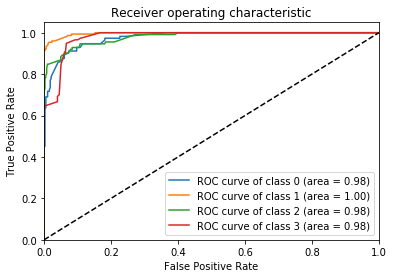

In [65]:
ytrain = label_binarize(y_train, classes=[0,1,2,3])
ytest = label_binarize(y_test, classes=[0,1,2,3])
n_classes = 4

# classifier
clf = OneVsRestClassifier(clf)
y_score = clf.fit(X_train_counts_tf, ytrain).decision_function(X_test_counts_tf)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(ytest[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
plt.figure()

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'''.format(i, roc_auc[i]))
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

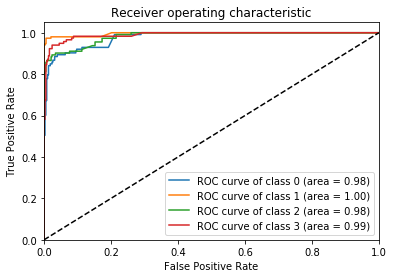

In [67]:
ytrain = label_binarize(y_train, classes=[0,1,2,3])
ytest = label_binarize(y_test, classes=[0,1,2,3])
n_classes = 4

# classifier
clf = OneVsRestClassifier(stack)
y_score = clf.fit(X_train_counts_tf, ytrain).decision_function(X_test_counts_tf)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(ytest[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
plt.figure()

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'''.format(i, roc_auc[i]))
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

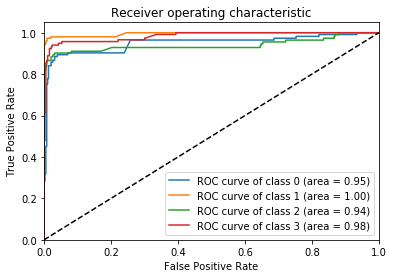

In [68]:
ytrain = label_binarize(y_train, classes=[0,1,2,3])
ytest = label_binarize(y_test, classes=[0,1,2,3])
n_classes = 4

# classifier
clf = OneVsRestClassifier(stack)
y_score = clf.fit(X_train_counts_tf, ytrain).decision_function(X_test_counts_tf)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(ytest[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
plt.figure()

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'''.format(i, roc_auc[i]))
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [70]:
y_train

1375    2
903     1
1939    3
1325    2
1995    3
       ..
1638    2
1095    1
1130    1
1294    1
860     1
Name: label, Length: 1971, dtype: int64

In [88]:
ytrain2 = np.array(y_train) == 1

In [89]:
ytest2 = np.array(y_test) == 1

In [90]:
base_learners = [('clf_1', LogisticRegression(C = 15)),
                 ('clf_2', svm.SVC(gamma = 'auto',C = 10, kernel = 'linear')) ]

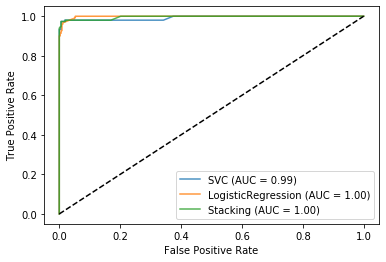

In [92]:
svc = svm.SVC(gamma = 'auto',C = 10, kernel = 'linear')
svc.fit(X_train_counts_tf, ytrain2)

lg = LogisticRegression(C = 15)
lg.fit(X_train_counts_tf, ytrain2)

stack_ = StackingClassifier(estimators = base_learners, final_estimator = LogisticRegression())
stack_.fit(X_train_counts_tf, ytrain2)

svc_disp = plot_roc_curve(svc, X_test_counts_tf, ytest2, alpha=0.8, name='SVC')
ax = plt.gca()
rfc_disp = plot_roc_curve(lg, X_test_counts_tf, ytest2, ax=ax, alpha=0.8, name='LogisticRegression')
#svc_disp.plot(ax=ax, alpha=0.8)

#svc_disp = plot_roc_curve(svc, X_test_counts_tf, ytest2, alpha=0.8, name='SVC')
#rfc_disp = plot_roc_curve(lg, X_test_counts_tf, ytest2, alpha=0.8, name='LogisticRegression')
stack_disp = plot_roc_curve(stack_, X_test_counts_tf,ytest2,ax=ax, alpha=0.8, name='Stacking')


plt.plot([0, 1], [0, 1], 'k--')
plt.show()

## Test

In [23]:
testpath = "/Users/jiangruiyin/Desktop/657/test_data.csv"

In [24]:
testdata = pd.read_csv(testpath, header=None, names=['lyrics', 'label'])

In [25]:
testdata

,lyrics,label
0,See the pyramids along the Nile Watch the sun...,2
1,We rented a truck and a semi to go Travel dow...,1
2,Im tired twisted barely breathing buried in th...,3
3,Yesterday I died tomorrows bleeding Fall into ...,3
4,You put the boomboom into my heart You send my...,1
...,...,...
377,He deals the cards as a meditation And those ...,3
378,Ive seen the dark side of the moon walked on ...,2
379,The local rock group down the street Is trying...,1
380,Dont label me a monster Im a monster just lik...,0


In [52]:
y_test = testdata['label'].values

In [53]:
y_test

array([2, 1, 3, 3, 1, 1, 3, 0, 3, 0, 2, 2, 2, 2, 2, 0, 3, 3, 0, 2, 2, 1,
       1, 3, 1, 1, 2, 1, 3, 2, 2, 0, 0, 3, 0, 3, 1, 2, 0, 1, 0, 0, 0, 1,
       3, 2, 3, 0, 0, 1, 0, 2, 1, 0, 1, 1, 1, 2, 3, 0, 3, 3, 2, 3, 1, 1,
       2, 0, 0, 2, 3, 1, 2, 2, 2, 0, 0, 1, 2, 2, 3, 3, 2, 0, 1, 2, 1, 3,
       1, 1, 2, 0, 2, 3, 2, 0, 2, 2, 1, 3, 3, 2, 2, 2, 0, 2, 2, 3, 2, 1,
       0, 3, 0, 1, 3, 3, 3, 2, 0, 2, 1, 1, 3, 2, 1, 1, 1, 1, 1, 2, 1, 1,
       3, 1, 1, 3, 2, 1, 3, 1, 1, 3, 2, 1, 0, 3, 0, 3, 1, 1, 2, 1, 3, 3,
       3, 3, 1, 0, 3, 1, 3, 1, 1, 3, 2, 2, 0, 2, 0, 3, 3, 0, 2, 2, 1, 2,
       3, 1, 3, 2, 2, 3, 0, 2, 2, 3, 2, 0, 2, 1, 1, 1, 1, 2, 2, 3, 0, 2,
       1, 2, 3, 0, 3, 3, 3, 2, 1, 1, 1, 1, 2, 3, 1, 2, 2, 2, 3, 1, 1, 1,
       1, 0, 3, 1, 1, 3, 2, 3, 1, 3, 0, 1, 0, 0, 0, 3, 2, 1, 2, 3, 0, 3,
       0, 1, 0, 1, 2, 3, 0, 0, 1, 0, 0, 1, 2, 2, 2, 3, 3, 3, 2, 3, 1, 2,
       0, 3, 1, 2, 0, 3, 0, 0, 2, 0, 2, 3, 3, 3, 1, 2, 0, 3, 1, 2, 0, 0,
       0, 2, 3, 1, 1, 2, 1, 3, 1, 3, 1, 0, 0, 2, 2,

In [63]:
X_test = testdata['lyrics'].values.astype('U')

In [65]:
X_test.shape

(382,)

In [72]:
#tf_transfomer_ = TfidfVectorizer(stop_words=stop_words, decode_error='ignore')
X_test_tf = tf_transfomer.transform(X_test)

In [73]:
y_pred = svc.predict(X_test_tf)
accu = accuracy_score(y_test, y_pred)
print(accu)

0.3010471204188482


In [84]:
print(clf.score(X_test_tf, y_test))

0.2801047120418848


In [85]:
print(stack_.score(X_test_tf, y_test))

0.3089005235602094


## The best stacking model

In [75]:
y_pred = stack.predict(X_test_tf)

In [76]:
y_pred

array([3, 3, 3, 3, 3, 1, 0, 0, 0, 3, 0, 3, 0, 2, 3, 3, 2, 0, 3, 1, 1, 2,
       3, 0, 3, 2, 0, 3, 0, 3, 0, 0, 3, 3, 0, 1, 2, 3, 0, 1, 0, 2, 3, 3,
       0, 3, 2, 0, 3, 3, 0, 3, 1, 0, 0, 3, 2, 3, 3, 2, 0, 2, 1, 2, 3, 3,
       1, 3, 0, 0, 1, 2, 2, 3, 0, 2, 3, 1, 3, 0, 2, 3, 2, 0, 2, 2, 3, 0,
       1, 0, 3, 3, 3, 2, 1, 0, 2, 2, 3, 2, 1, 1, 0, 0, 3, 2, 3, 1, 0, 0,
       3, 1, 2, 1, 1, 3, 1, 2, 0, 2, 2, 0, 3, 2, 2, 3, 2, 0, 3, 2, 2, 1,
       3, 3, 1, 0, 2, 3, 2, 2, 3, 3, 2, 1, 3, 3, 0, 3, 3, 2, 2, 1, 1, 0,
       0, 1, 3, 0, 3, 0, 0, 3, 3, 3, 1, 2, 3, 3, 2, 2, 2, 3, 1, 3, 1, 2,
       2, 2, 2, 3, 3, 2, 3, 0, 3, 0, 3, 3, 0, 2, 3, 1, 2, 1, 3, 2, 0, 1,
       1, 1, 2, 3, 2, 3, 3, 3, 2, 3, 0, 2, 3, 0, 1, 3, 1, 1, 0, 0, 2, 2,
       3, 3, 3, 3, 3, 2, 2, 1, 0, 3, 0, 3, 3, 0, 0, 1, 1, 2, 0, 1, 0, 3,
       0, 2, 3, 3, 2, 0, 0, 0, 2, 3, 2, 0, 1, 2, 2, 0, 2, 2, 2, 2, 3, 3,
       0, 2, 1, 1, 0, 2, 0, 3, 0, 3, 2, 1, 2, 3, 0, 2, 2, 0, 2, 0, 0, 3,
       3, 3, 0, 3, 2, 2, 2, 3, 1, 3, 1, 0, 0, 1, 2,

In [77]:
y_pred.shape

(382,)

In [79]:
print(stack.score(X_test_tf, y_test))

0.306282722513089


In [39]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [48]:
cm = confusion_matrix(y_test, y_pred)
display_labels = ['Angry', 'Happy', 'Sad', 'Relaxed']
#cm_display = ConfusionMatrixDisplay(cm, display_labels=display_labels).plot()

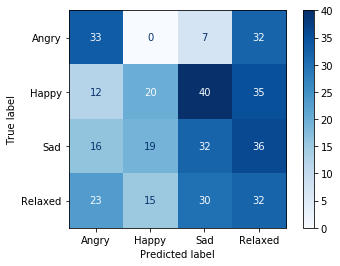

In [86]:
from sklearn.metrics import plot_confusion_matrix
display_labels = ['Angry', 'Happy', 'Sad', 'Relaxed']
plot_confusion_matrix(classifier, X_test, y_test, display_labels=display_labels, cmap = 'Blues')  
plt.show()

In [87]:
from sklearn.metrics import classification_report
target_names = ['Angry', 'Happy', 'Sad', 'Relaxed']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

       Angry       0.39      0.46      0.42        72
       Happy       0.37      0.19      0.25       107
         Sad       0.29      0.31      0.30       103
     Relaxed       0.24      0.32      0.27       100

    accuracy                           0.31       382
   macro avg       0.32      0.32      0.31       382
weighted avg       0.32      0.31      0.30       382

